In [1]:
import yfinance as yf
import pandas as pd

def fetch_stock_data(ticker="INDIGO.NS", start_date="2018-01-01", end_date=None):
    """
    Fetches historical stock data from Yahoo Finance for a given ticker.
    Returns a DataFrame with 'ds' and 'y' columns (for Prophet).
    """
    df = yf.download(ticker, start=start_date, end=end_date)
    df.reset_index(inplace=True)
    df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    return df


In [3]:
df = fetch_stock_data("INDIGO.NS")
print(df.head())
print(df.tail())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          ds            y
Ticker               INDIGO.NS
0      2018-01-01  1191.461426
1      2018-01-02  1189.876831
2      2018-01-03  1196.809692
3      2018-01-04  1202.009277
4      2018-01-05  1187.103516
Price          ds            y
Ticker               INDIGO.NS
1787   2025-03-27  5127.799805
1788   2025-03-28  5115.350098
1789   2025-04-01  5028.000000
1790   2025-04-02  5068.250000
1791   2025-04-03  5003.600098


In [5]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [7]:
from prophet import Prophet

def forecast_stock(df):
    """
    Fits a Prophet model to the stock data and returns forecast DataFrame.
    """
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=180)  # Forecast next 180 days
    forecast = model.predict(future)
    return forecast


In [11]:
df = df.reset_index(level=0, drop=True)


In [23]:
df.head()

Ticker,,INDIGO.NS
0,2018-01-01,1191.461426
1,2018-01-02,1189.876831
2,2018-01-03,1196.809692
3,2018-01-04,1202.009277
4,2018-01-05,1187.103516


In [15]:
df.dtypes

Price  Ticker   
ds                  datetime64[ns]
y      INDIGO.NS           float64
dtype: object

In [29]:
df.columns

Index(['ds', 'INDIGO.NS'], dtype='object', name='Ticker')

In [31]:
df.head()

Ticker,ds,INDIGO.NS
0,2018-01-01,1191.461426
1,2018-01-02,1189.876831
2,2018-01-03,1196.809692
3,2018-01-04,1202.009277
4,2018-01-05,1187.103516


In [33]:
# Rename 'INDIGO.NS' to 'y'
df = df.rename(columns={'INDIGO.NS': 'y'})

# Keep only 'ds' and 'y'
df = df[['ds', 'y']].copy()

# Ensure 'ds' is datetime
df['ds'] = pd.to_datetime(df['ds'])

# Drop any missing values and reset index
df = df.dropna().reset_index(drop=True)

# Final check before using Prophet
print(df.dtypes)
print(df.head())


Ticker
ds    datetime64[ns]
y            float64
dtype: object
Ticker         ds            y
0      2018-01-01  1191.461426
1      2018-01-02  1189.876831
2      2018-01-03  1196.809692
3      2018-01-04  1202.009277
4      2018-01-05  1187.103516


In [37]:
from prophet import Prophet

model = Prophet()
model.fit(df)

# Forecast the next 180 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# View forecast output
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


15:20:01 - cmdstanpy - INFO - Chain [1] start processing
15:20:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2152,2026-03-30,6599.999699,5930.538303,7288.348141
2153,2026-03-31,6613.405680,5954.030094,7259.573525
2154,2026-04-01,6621.903433,5992.752462,7272.329062
2155,2026-04-02,6635.046558,5986.207789,7325.610576
2156,2026-04-03,6640.889177,5969.175706,7372.977203


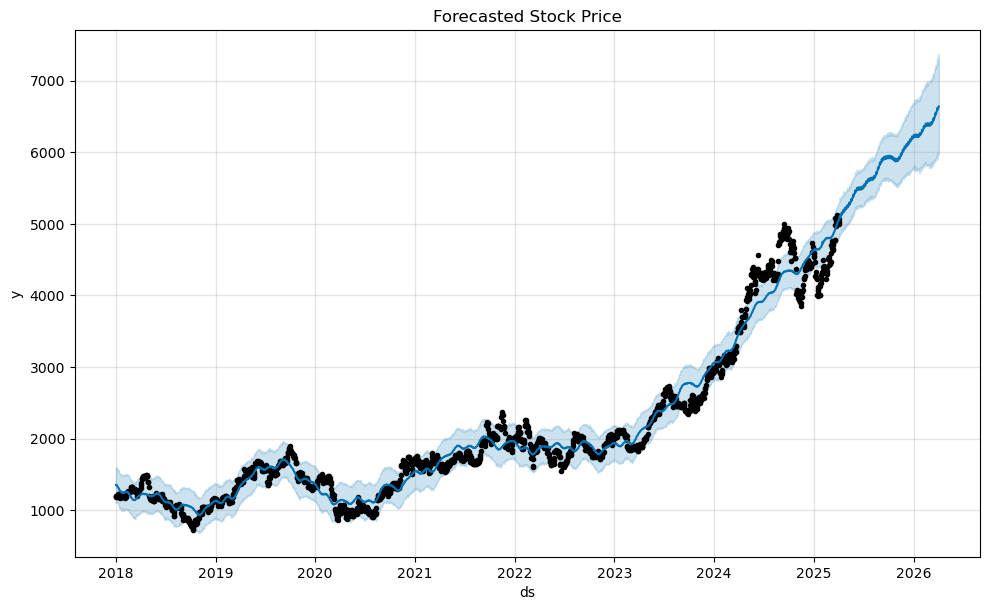

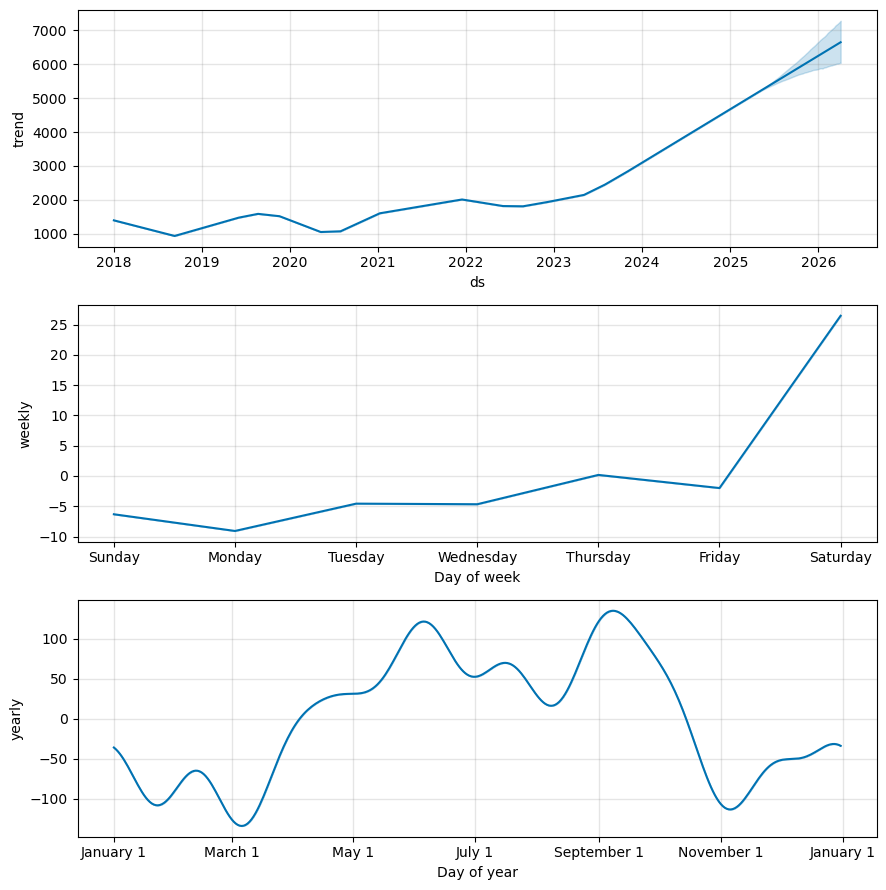

In [41]:
import matplotlib.pyplot as plt
# Forecast Plot
fig1 = model.plot(forecast)
plt.title('Forecasted Stock Price')
plt.show()

# Forecast Components (trend, weekly, yearly)
fig2 = model.plot_components(forecast)
plt.show()

In [43]:
df.head()

Ticker,ds,y
0,2018-01-01,1191.461426
1,2018-01-02,1189.876831
2,2018-01-03,1196.809692
3,2018-01-04,1202.009277
4,2018-01-05,1187.103516


In [45]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,1397.986933,1104.691015,1594.012230,1397.986933,1397.986933,-44.368587,-44.368587,-44.368587,-9.084227,-9.084227,-9.084227,-35.284360,-35.284360,-35.284360,0.0,0.0,0.0,1353.618346
1,2018-01-02,1396.160592,1119.860289,1604.647997,1396.160592,1396.160592,-41.939089,-41.939089,-41.939089,-4.570712,-4.570712,-4.570712,-37.368377,-37.368377,-37.368377,0.0,0.0,0.0,1354.221503
2,2018-01-03,1394.334252,1105.601383,1589.022728,1394.334252,1394.334252,-44.563751,-44.563751,-44.563751,-4.668129,-4.668129,-4.668129,-39.895623,-39.895623,-39.895623,0.0,0.0,0.0,1349.770500
3,2018-01-04,1392.507911,1108.834478,1592.344030,1392.507911,1392.507911,-42.674949,-42.674949,-42.674949,0.174581,0.174581,0.174581,-42.849530,-42.849530,-42.849530,0.0,0.0,0.0,1349.832962
4,2018-01-05,1390.681570,1117.474004,1586.276649,1390.681570,1390.681570,-48.198922,-48.198922,-48.198922,-1.995344,-1.995344,-1.995344,-46.203578,-46.203578,-46.203578,0.0,0.0,0.0,1342.482648


In [47]:
def plot_forecast(df, forecast):
    """
    Plots actual vs forecasted stock prices.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.3, color='skyblue')
    plt.title('Actual vs Forecasted Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


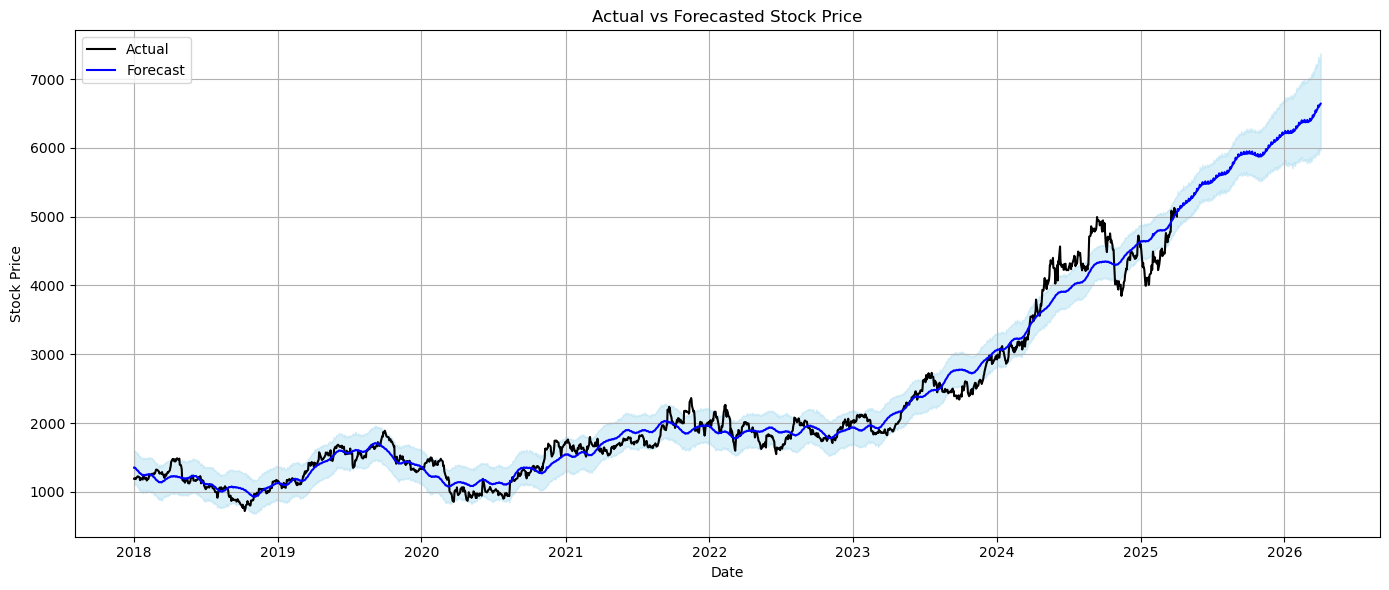

In [49]:
plot_forecast(df, forecast)

In [51]:
def add_moving_averages(df):
    """
    Adds 50-day and 200-day moving averages to the original stock price dataframe.
    """
    df = df.copy()
    df['MA50'] = df['y'].rolling(window=50).mean()
    df['MA200'] = df['y'].rolling(window=200).mean()
    return df


In [53]:
ma_df = add_moving_averages(df)
ma_df.tail()  # Optional: View last few rows with MA50 & MA200


Ticker,ds,y,MA50,MA200
1787,2025-03-27,5127.799805,4490.993994,4444.322001
1788,2025-03-28,5115.350098,4511.065996,4448.051251
1789,2025-04-01,5028.000000,4529.821997,4451.689252
1790,2025-04-02,5068.250000,4548.901001,4455.517252
1791,2025-04-03,5003.600098,4568.777002,4459.183253


In [57]:
def plot_moving_averages(ma_df):
    """
    Plots stock price with MA50 and MA200.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 6))
    plt.plot(ma_df['ds'], ma_df['y'], label='Stock Price', color='black')
    plt.plot(ma_df['ds'], ma_df['MA50'], label='MA50', color='green', linestyle='--')
    plt.plot(ma_df['ds'], ma_df['MA200'], label='MA200', color='red', linestyle='--')
    plt.title('Stock Price with MA50 & MA200')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


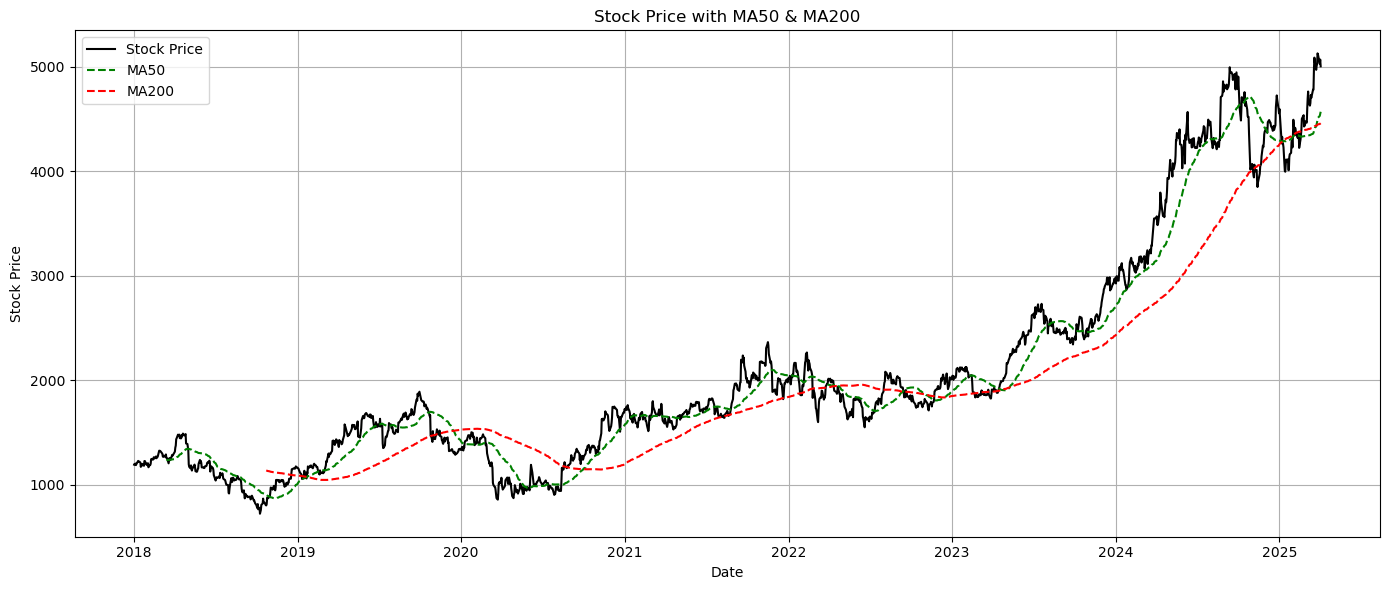

In [59]:
plot_moving_averages(ma_df)


In [61]:
def compare_with_linear_regression(df):
    """
    Compares Prophet's trend with a simple linear regression trend line.
    """
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt
    import numpy as np

    df = df.copy()
    df = df.dropna()
    
    # Convert dates to ordinal for regression
    df['ds_ordinal'] = df['ds'].map(lambda date: date.toordinal())
    
    X = df[['ds_ordinal']]
    y = df['y']
    
    model = LinearRegression()
    model.fit(X, y)
    
    df['Linear_Trend'] = model.predict(X)

    # Plot comparison
    plt.figure(figsize=(14, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(df['ds'], df['Linear_Trend'], label='Linear Trend', color='orange')
    plt.title('Linear Regression Trend vs Actual Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


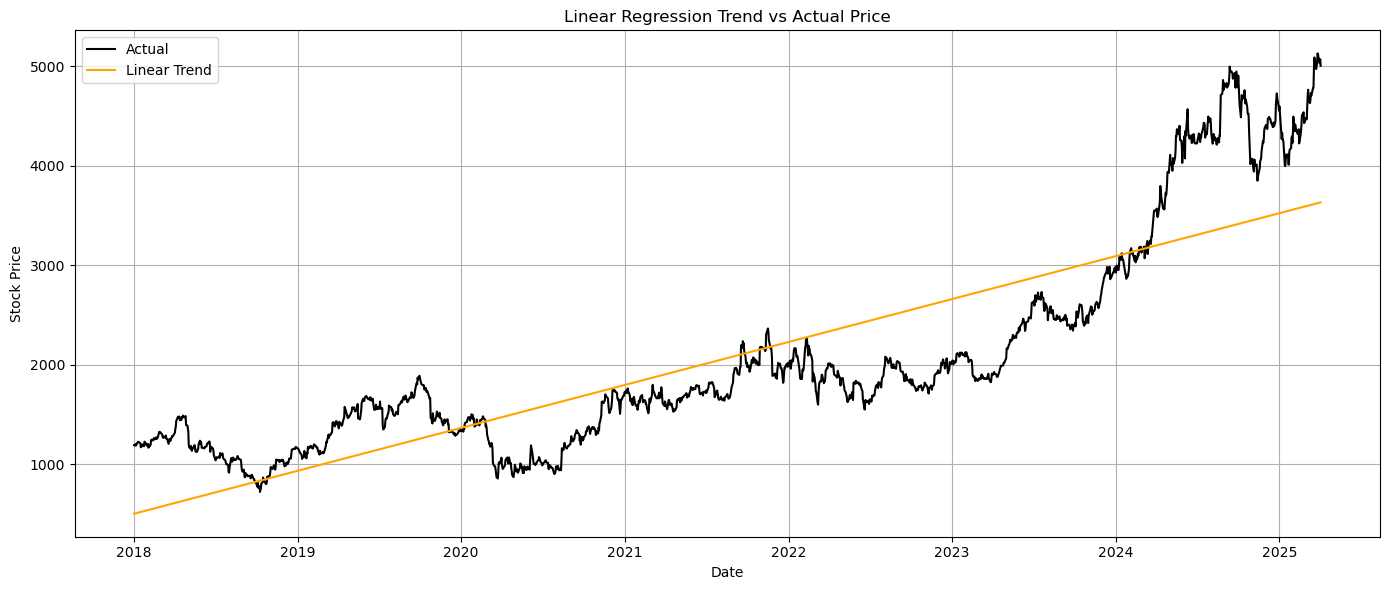

In [63]:
compare_with_linear_regression(df)


The linear regression line fails to fully capture the price dynamics of IndiGo. While it does follow the overall upward trend, recent price spikes deviate significantly above the fitted line, indicating that the stock exhibits non-linear behavior and volatility that simple linear models cannot explain. This validates the need for more complex models like Prophet or classification-based approaches.

In [66]:
def prepare_classification_data(df):
    df = df.copy()
    df = df.sort_values('ds')

    # Create lagged returns as features
    df['return_1d'] = df['y'].pct_change()
    df['return_2d'] = df['y'].pct_change(2)
    df['return_3d'] = df['y'].pct_change(3)

    # Create binary target: 1 if price goes up next day, 0 if down or equal
    df['Target'] = (df['y'].shift(-1) > df['y']).astype(int)

    # Drop rows with NaN values (due to lagging)
    df = df.dropna()

    return df


To build a model that predicts short-term stock movement, we engineered the following features:

return_1d: Percentage return from the previous day.

return_2d: Return from two days ago.

return_3d: Return from three days ago.

These lagged returns help the model understand recent price momentum and short-term volatility, which can be useful indicators of the next day's direction

In [68]:
class_df = prepare_classification_data(df)
class_df[['ds', 'y', 'return_1d', 'return_2d', 'return_3d', 'Target']].head()


Ticker,ds,y,return_1d,return_2d,return_3d,Target
3,2018-01-04,1202.009277,0.004345,0.010196,0.008853,0
4,2018-01-05,1187.103516,-0.012401,-0.008110,-0.002331,1
5,2018-01-08,1213.448486,0.022193,0.009517,0.013903,1
6,2018-01-09,1215.330200,0.001551,0.023778,0.011082,1
7,2018-01-10,1227.264771,0.009820,0.011386,0.033831,0


In [81]:
class_df.columns

Index(['ds', 'y', 'return_1d', 'return_2d', 'return_3d', 'Target'], dtype='object', name='Ticker')

In [87]:
def plot_class_distribution_pie(class_df, target_column='Target'):
    """
    Plot the class distribution as a pie chart.
    
    Parameters:
    - class_df: DataFrame containing the classification data
    - target_column: The column representing target labels (default: 'Target')
    """
    class_counts = class_df[target_column].value_counts()
    labels = [f'No Crash (0) - {class_counts[0]}', f'Crash Risk (1) - {class_counts[1]}']
    colors = ['#66b3ff', '#ff9999']

    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Target Class Distribution (Pie Chart)")
    plt.axis('equal')
    plt.show()


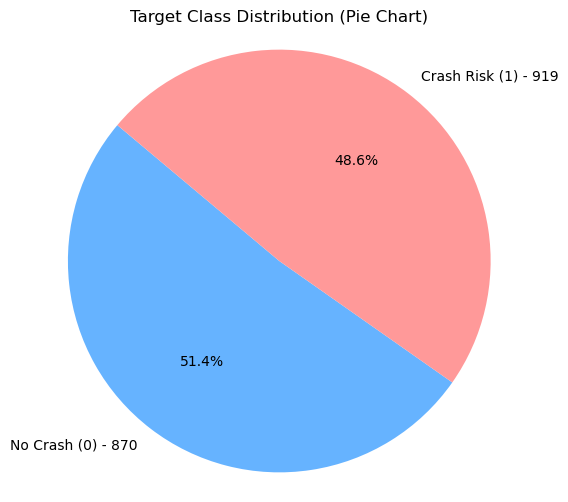

In [91]:
plot_class_distribution_pie(class_df, target_column='Target')

Since there is equal distribution, this indicates no class bias and hence, a random forest model will be used to predict stock market crashes for IndiGo

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_random_forest(df):
    df = df.copy()
    X = df.drop(columns=['Target'])
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n")
    print(classification_report(y_test, predictions))

    return model, X_test, y_test, predictions, probs


In [73]:
rf_model, X_test, y_test, preds, probs = train_random_forest(class_df)


Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.51      0.48       156
           1       0.58      0.51      0.54       202

    accuracy                           0.51       358
   macro avg       0.51      0.51      0.51       358
weighted avg       0.52      0.51      0.52       358



We use Brent Crude Futures (BZ=F) as a global oil price proxy to assess macroeconomic pressure on airlines. Since aviation fuel is a major operational cost, rising oil prices often correlate with stock declines. Missing values are dropped to maintain consistency in merging with stock data

combining features 

In [95]:
import yfinance as yf

def fetch_oil_prices():
    """
    Fetches Brent Crude Oil (BZ=F) daily close prices from Yahoo Finance.
    Returns a cleaned DataFrame with ['ds', 'oil_price'].
    """
    import yfinance as yf
    oil_data = yf.Ticker("BZ=F").history(period="max")
    oil_data = oil_data[['Close']].rename(columns={'Close': 'oil_price'})
    oil_data.reset_index(inplace=True)
    oil_data.rename(columns={'Date': 'ds'}, inplace=True)
    oil_data.dropna(inplace=True)
    return oil_data



In [97]:
oil_df = fetch_oil_prices()


In [99]:
oil_df

,ds,oil_price
0,2007-07-30 00:00:00-04:00,75.739998
1,2007-07-31 00:00:00-04:00,77.050003
2,2007-08-01 00:00:00-04:00,75.349998
3,2007-08-02 00:00:00-04:00,75.760002
4,2007-08-03 00:00:00-04:00,74.750000
...,...,...
4393,2025-03-31 00:00:00-04:00,74.739998
4394,2025-04-01 00:00:00-04:00,74.489998
4395,2025-04-02 00:00:00-04:00,74.949997
4396,2025-04-03 00:00:00-04:00,70.139999


The ds column fetched from Yahoo Finance includes timezone information, which can cause issues during merging with other datasets that use naive datetime. We convert it to naive datetime using tz_localize(None) to ensure a clean and consistent merge.

In [101]:
oil_df['ds'] = pd.to_datetime(oil_df['ds']).dt.tz_localize(None)


In [108]:
# Step 1: Ensure 'ds' in both dataframes is datetime and timezone-naive
class_df['ds'] = pd.to_datetime(class_df['ds'])
oil_df['ds'] = pd.to_datetime(oil_df['ds']).dt.tz_localize(None)

# Step 2: Merge the stock data with oil prices
merged_df = pd.merge(class_df, oil_df, on='ds', how='left')

# Step 3: Drop rows where oil price is missing (optional, depending on your modeling strategy)
merged_df = merged_df.dropna(subset=['oil_price'])


In [110]:
merged_df.head()

,ds,y,return_1d,return_2d,return_3d,Target,oil_price
0,2018-01-04,1202.009277,0.004345,0.010196,0.008853,0,68.070000
1,2018-01-05,1187.103516,-0.012401,-0.008110,-0.002331,1,67.620003
2,2018-01-08,1213.448486,0.022193,0.009517,0.013903,1,67.779999
3,2018-01-09,1215.330200,0.001551,0.023778,0.011082,1,68.820000
4,2018-01-10,1227.264771,0.009820,0.011386,0.033831,0,69.199997


To capture investor uncertainty and market turbulence, we compute 30-day rolling volatility based on daily returns. This acts as a proxy for internal stock risk, complementing external factors like oil prices.

In [112]:
# Calculate 30-day rolling volatility of daily returns
merged_df['volatility_30d'] = merged_df['return_1d'].rolling(window=30).std()

# Drop initial NaN rows created due to rolling window
merged_df = merged_df.dropna(subset=['volatility_30d'])


In [115]:
merged_df.head()

,ds,y,return_1d,return_2d,return_3d,Target,oil_price,volatility_30d
31,2018-02-20,1253.015381,-0.013644,0.000395,0.002496,1,65.250000,0.017234
32,2018-02-21,1261.780396,0.006995,-0.006744,0.007393,1,65.419998,0.017256
33,2018-02-22,1263.216431,0.001138,0.008141,-0.005614,1,66.389999,0.017054
34,2018-02-23,1272.674927,0.007488,0.008634,0.015690,1,67.309998,0.016661
35,2018-02-26,1325.116943,0.041206,0.049002,0.050196,0,67.500000,0.018168


Moving Averages (MA50 & MA200) are classic indicators used to detect long- and short-term trends. Crossovers (e.g., MA50 dropping below MA200) often signal bearish momentum. Including them helps the model capture technical risk patterns beyond raw returns.

In [117]:
# 50-day moving average
merged_df['MA50'] = merged_df['y'].rolling(window=50).mean()

# 200-day moving average
merged_df['MA200'] = merged_df['y'].rolling(window=200).mean()

# Drop rows with NaN values due to MA calculations
merged_df = merged_df.dropna(subset=['MA50', 'MA200'])


In [140]:
merged_df.head()

,ds,y,return_1d,return_2d,return_3d,Target,oil_price,volatility_30d,MA50,MA200
235,2018-12-19,1147.853760,0.038746,0.086171,0.084636,1,57.240002,0.027129,942.170171,1098.182144
236,2018-12-20,1148.451904,0.000521,0.039287,0.086737,1,54.349998,0.025743,948.856223,1097.659326
237,2018-12-21,1150.844360,0.002083,0.002605,0.041452,1,53.820000,0.025642,956.584011,1097.104646
238,2018-12-24,1157.772705,0.006020,0.008116,0.008641,0,50.470001,0.025354,964.151304,1096.577428
239,2018-12-26,1152.638794,-0.004434,0.001559,0.003646,1,54.470001,0.025444,972.760332,1095.977247


In [120]:
features = ['y', 'return_1d', 'return_2d', 'return_3d', 'oil_price', 'MA50', 'MA200']
corr = merged_df[features].corr()
corr

,y,return_1d,return_2d,return_3d,oil_price,MA50,MA200
y,1.000000,0.025462,0.037773,0.051075,0.349200,0.984133,0.947826
return_1d,0.025462,1.000000,0.724486,0.591317,-0.006374,-0.012263,-0.010283
return_2d,0.037773,0.724486,1.000000,0.829357,-0.016563,-0.014602,-0.010758
return_3d,0.051075,0.591317,0.829357,1.000000,-0.019766,-0.012325,-0.007820
oil_price,0.349200,-0.006374,-0.016563,-0.019766,1.000000,0.359228,0.353447
MA50,0.984133,-0.012263,-0.014602,-0.012325,0.359228,1.000000,0.969340
MA200,0.947826,-0.010283,-0.010758,-0.007820,0.353447,0.969340,1.000000


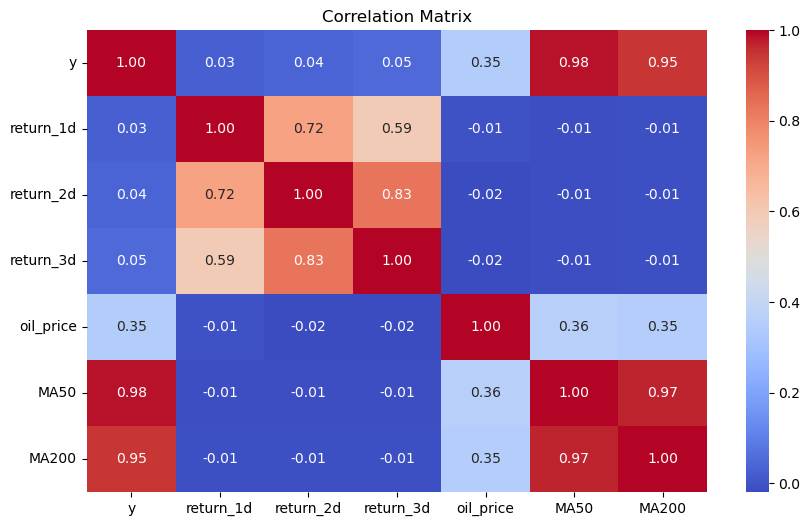

In [122]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Correlation Insights
Stock price (y) is strongly correlated with MA50 (0.98) and MA200 (0.95) — as expected, since moving averages are derived from price.

Oil prices show a moderate positive correlation with y (0.35), MA50 (0.36), and MA200 (0.35), indicating macroeconomic influence.

Short-term returns (return_1d, return_2d, return_3d) are weakly correlated with the actual price or technical indicators, capturing short bursts of volatility rather than long-term trends.

There’s high correlation among returns themselves, especially between return_2d and return_3d (0.83), reflecting overlapping windows.

This correlation matrix helps validate the feature selection. While some variables are strongly interrelated, the blend of short-term volatility and macro signals may improve model generalization.

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_random_forest(df):
    df = df.copy()
    X = df.drop(columns=['Target','ds'])
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n")
    print(classification_report(y_test, predictions))

    return model, X_test, y_test, predictions, probs

The train_random_forest function encapsulates our entire pipeline — from splitting the data to evaluating model performance. We use a time-aware split (shuffle=False) to reflect real-world prediction scenarios, where we forecast future behavior based on past data.

In [142]:
model, X_test, y_test, predictions, probs = train_random_forest(merged_df)


Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       136
           1       0.58      0.63      0.61       165

    accuracy                           0.55       301
   macro avg       0.54      0.54      0.54       301
weighted avg       0.55      0.55      0.55       301



Classification Report Insights
The model's performance, while not exceptional, offers meaningful predictive value. Here's what the classification report reveals:

Accuracy: 55% — This indicates the model is slightly better than random guessing. It's a modest starting point, suggesting there's potential but also room for improvement.

Class Imbalance Handling:

Class 0 (Down movement): Precision = 0.50, Recall = 0.46

Class 1 (Up movement): Precision = 0.58, Recall = 0.63

The model is better at identifying when the stock will go up (Class 1) than when it will go down.

F1 Score:

F1-score for Class 1 is 0.61, compared to 0.48 for Class 0.

This imbalance suggests the model has learned upward trends better, potentially influenced by overall market bullishness during the period.

Macro vs Weighted Average:

The macro average F1 (0.54) and weighted average F1 (0.55) are close, indicating that class imbalance is not dramatically skewing the results, but still something to keep in mind.

You could close this section with:

While the performance is not yet ready for production-level forecasting, it lays a solid foundation. Improvements may come from incorporating additional signals such as VIX, macroeconomic indicators, or more refined technical patterns.

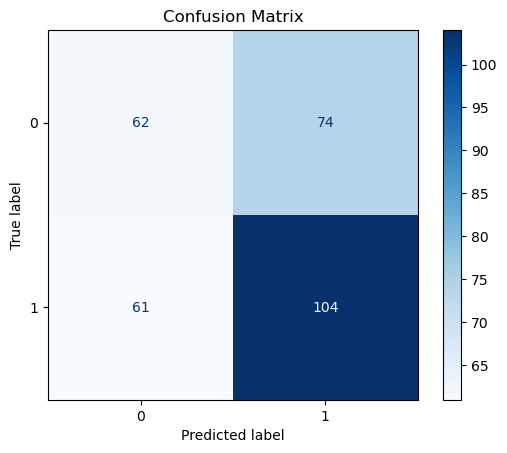

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, predictions)


In [153]:
confusion_matrix(y_test, predictions)

array([[ 62,  74],
       [ 61, 104]], dtype=int64)

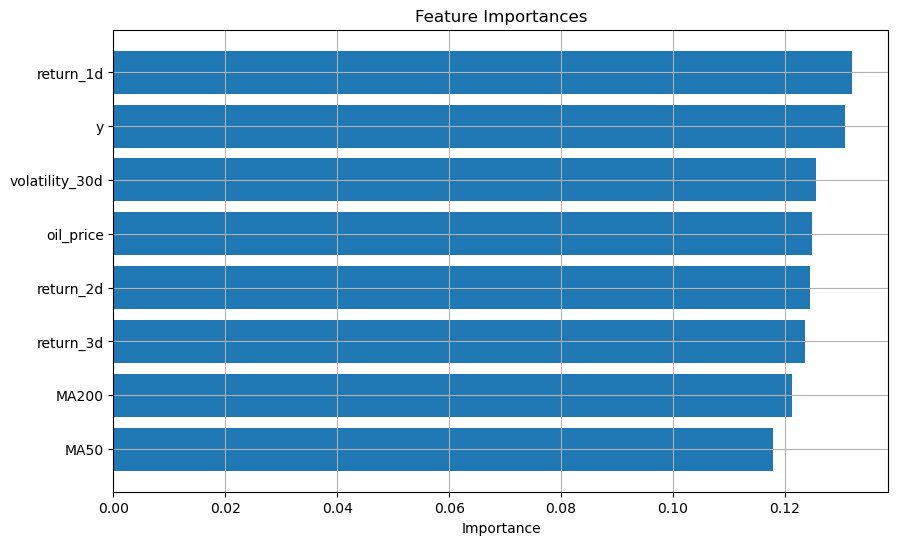

In [146]:
def plot_feature_importances(model, X_test):
    importances = model.feature_importances_
    features = X_test.columns
    sorted_idx = importances.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(features[sorted_idx], importances[sorted_idx])
    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.grid(True)
    plt.show()

plot_feature_importances(model, X_test)


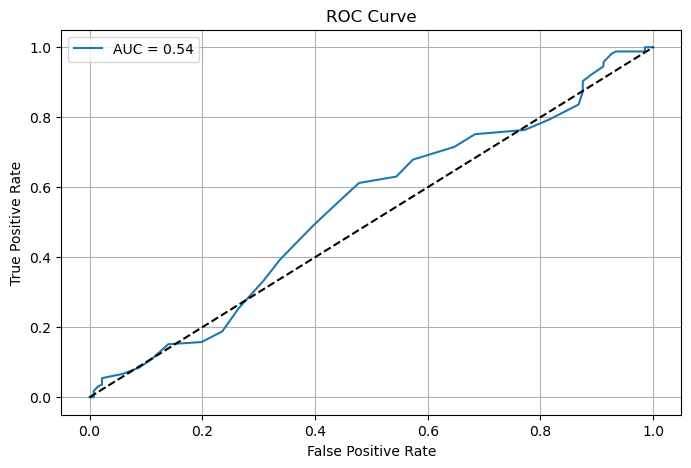

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve(y_test, probs)


While explainability tools like SHAP offer model-level introspection, they’re more useful in personalized or high-risk prediction contexts. Since this blog focuses on identifying airline stock risk patterns over time, aggregate trends and feature importances suffice for interpretability.

**Can Machine Learning Identify Airline Stock Risks Before They Crash?**

### Introduction

Airline stocks are notoriously volatile, influenced by fuel prices, regulatory policies, and operational disruptions. Investors, analysts, and even airline insiders constantly seek predictive signals to anticipate stock movements before they happen. With machine learning increasingly used in financial markets, can we apply it to forecast airline stock risks? This study attempts to answer that question using IndiGo, India’s largest airline, as a test case.



### Findings: The Limits of Technical Models

The model’s results were underwhelming—**AUC (Area Under Curve) of 0.54**, meaning only slightly better than random guessing. The confusion matrix revealed:
- **62 correct downward predictions, 74 incorrect**
- **104 correct upward predictions, 61 incorrect**

Key feature importances indicated that **short-term price movements (return_1d, return_2d, return_3d) and oil prices** had some correlation, but none were strongly predictive.

### What This Means for Airline Stock Forecasting

While the model captures some market behavior, it struggles with broader forces shaping airline valuations. The reasons are clear:
1. **Regulatory & Policy Factors Are Missing** – Government actions such as route allocations, pricing caps, and bailout packages impact airline stocks more than short-term price movements.
2. **Fleet & Capacity Decisions Matter** – Aircraft orders, lease structures, and load factors drive revenue, yet these data points aren't reflected in simple price trends.
3. **Market Sentiment & Competitor Moves** – Airline stock reactions often stem from competitors’ pricing strategies, new market entries, and external shocks (COVID-19, oil embargoes, geopolitical tensions).

### The Bigger Picture: Where Real Insights Lie

This analysis highlights an important reality: **machine learning models alone cannot predict airline stock crashes**. However, the real value lies in combining **financial signals with operational insights and policy foresight**.

For instance, the failure of Jet Airways was not primarily due to fluctuating oil prices or technical indicators—it was driven by policy blind spots, fleet grounding issues, and regulatory inaction.


### Conclusion: Moving Beyond the Numbers

This study underscores that while machine learning can enhance airline risk analysis, **it cannot replace expert judgment**. The biggest opportunities in aviation stock forecasting lie in:
- **Anticipating regulatory shifts** before they impact stock prices
- **Understanding fleet expansion strategies** as a market indicator
- **Identifying competitive dynamics** that dictate revenue sustainability

Investors and industry insiders who integrate **data-driven signals with insider-aware forecasting** will have a stronger edge than those who rely solely on financial models. The true advantage lies in seeing what the algorithms miss—and acting before the market catches up.


